In [218]:
# Librairies et fonctions

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [219]:
df = pd.read_csv('donnees_simulees.csv')
df.head()

,UFR,Filière,Sexe,Niveau,Fréquence d'utilisation,Durée par session (min),Impact sur la motivation,Moyenne actuelle,Moyenne avant l'accès,Moyenne après l'accès,Temps d'étude/semaine (h),Usage de la connexion,Statut de réussite
0,SEG,HA,Feminin,L3,Occasionnelle,179,Augmenté,7.131486,10.186278,16.147228,7,Réseaux sociax,1
1,ST,SVT,Feminin,L2,Quotidienne,145,Diminué,3.547731,12.618552,16.408861,11,Réseaux sociax,1
2,LSH,HA,Masculin,L2,Quotidienne,10,Augmenté,15.392803,4.821351,12.657355,8,Autres,1
3,SEG,MPCI,Masculin,L2,Occasionnelle,245,Augmenté,11.010319,5.627384,7.837539,21,Réseaux sociax,1
4,SEG,MPCI,Masculin,L2,Occasionnelle,36,Augmenté,9.919945,5.524963,4.105976,30,Autres,0


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   UFR                        2000 non-null   object 
 1   Filière                    2000 non-null   object 
 2   Sexe                       2000 non-null   object 
 3   Niveau                     2000 non-null   object 
 4   Fréquence d'utilisation    2000 non-null   object 
 5   Durée par session (min)    2000 non-null   int64  
 6   Impact sur la motivation   2000 non-null   object 
 7   Moyenne actuelle           2000 non-null   float64
 8   Moyenne avant l'accès      2000 non-null   float64
 9   Moyenne après l'accès      2000 non-null   float64
 10  Temps d'étude/semaine (h)  2000 non-null   int64  
 11  Usage de la connexion      2000 non-null   object 
 12  Statut de réussite         2000 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage:

In [221]:
# Calcul de la variation de la moyenne académique
df['variation_moyenne'] = df['Moyenne après l\'accès'] - df['Moyenne avant l\'accès']

# Définir l'impact global (Positif, Négatif, Neutre)
def definir_impact(row):
    if row['variation_moyenne'] > 0:
        return 1
    elif row['variation_moyenne'] < 0:
        return 0
    else:
        return 3

df['impact_global'] = df.apply(definir_impact, axis=1)
df.drop('variation_moyenne', axis=1)


,UFR,Filière,Sexe,Niveau,Fréquence d'utilisation,Durée par session (min),Impact sur la motivation,Moyenne actuelle,Moyenne avant l'accès,Moyenne après l'accès,Temps d'étude/semaine (h),Usage de la connexion,Statut de réussite,impact_global
0,SEG,HA,Feminin,L3,Occasionnelle,179,Augmenté,7.131486,10.186278,16.147228,7,Réseaux sociax,1,1
1,ST,SVT,Feminin,L2,Quotidienne,145,Diminué,3.547731,12.618552,16.408861,11,Réseaux sociax,1,1
2,LSH,HA,Masculin,L2,Quotidienne,10,Augmenté,15.392803,4.821351,12.657355,8,Autres,1,1
3,SEG,MPCI,Masculin,L2,Occasionnelle,245,Augmenté,11.010319,5.627384,7.837539,21,Réseaux sociax,1,1
4,SEG,MPCI,Masculin,L2,Occasionnelle,36,Augmenté,9.919945,5.524963,4.105976,30,Autres,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,ST,SVT,Masculin,L3,Hebdomadaire,137,Augmenté,12.690644,4.296285,7.678295,21,Réseaux sociax,1,1
1996,ST,SVT,Masculin,L3,Hebdomadaire,126,Diminué,7.812432,7.684751,15.753840,19,Recherche,0,1
1997,SEG,Geographie,Masculin,L3,Occasionnelle,140,Augmenté,3.949654,12.396315,11.700951,9,Autres,1,0
1998,LSH,Geographie,Masculin,L3,Occasionnelle,235,Inchangé,9.270619,9.221445,7.294811,30,Réseaux sociax,0,0


## Encodeage des variables catégorielles

In [222]:
from sklearn.preprocessing import LabelEncoder

# Instanciation d'un encodeur
label_encoder = LabelEncoder()

# Sélection des colonnes à encoder
categorical_columns = ["UFR", "Filière", "Sexe", "Niveau", "Fréquence d'utilisation", "Impact sur la motivation", "Usage de la connexion"]

# Application de l'encodage sur chaque colonne catégorielle
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


## Histogrammes pour la distribution des notes avant, pendant et après

In [223]:
# Statistiques descriptives
print(df.describe())


               UFR      Filière         Sexe      Niveau  \
count  2000.000000  2000.000000  2000.000000  2000.00000   
mean      0.989000     2.984000     0.499000     1.00400   
std       0.817443     2.003934     0.500124     0.82724   
min       0.000000     0.000000     0.000000     0.00000   
25%       0.000000     1.000000     0.000000     0.00000   
50%       1.000000     3.000000     0.000000     1.00000   
75%       2.000000     5.000000     1.000000     2.00000   
max       2.000000     6.000000     1.000000     2.00000   

       Fréquence d'utilisation  Durée par session (min)  \
count              2000.000000              2000.000000   
mean                  0.976000               151.658500   
std                   0.816552                85.099941   
min                   0.000000                 5.000000   
25%                   0.000000                80.750000   
50%                   1.000000               150.000000   
75%                   2.000000               2

Text(0.5, 1.0, 'Distribution des notes après')

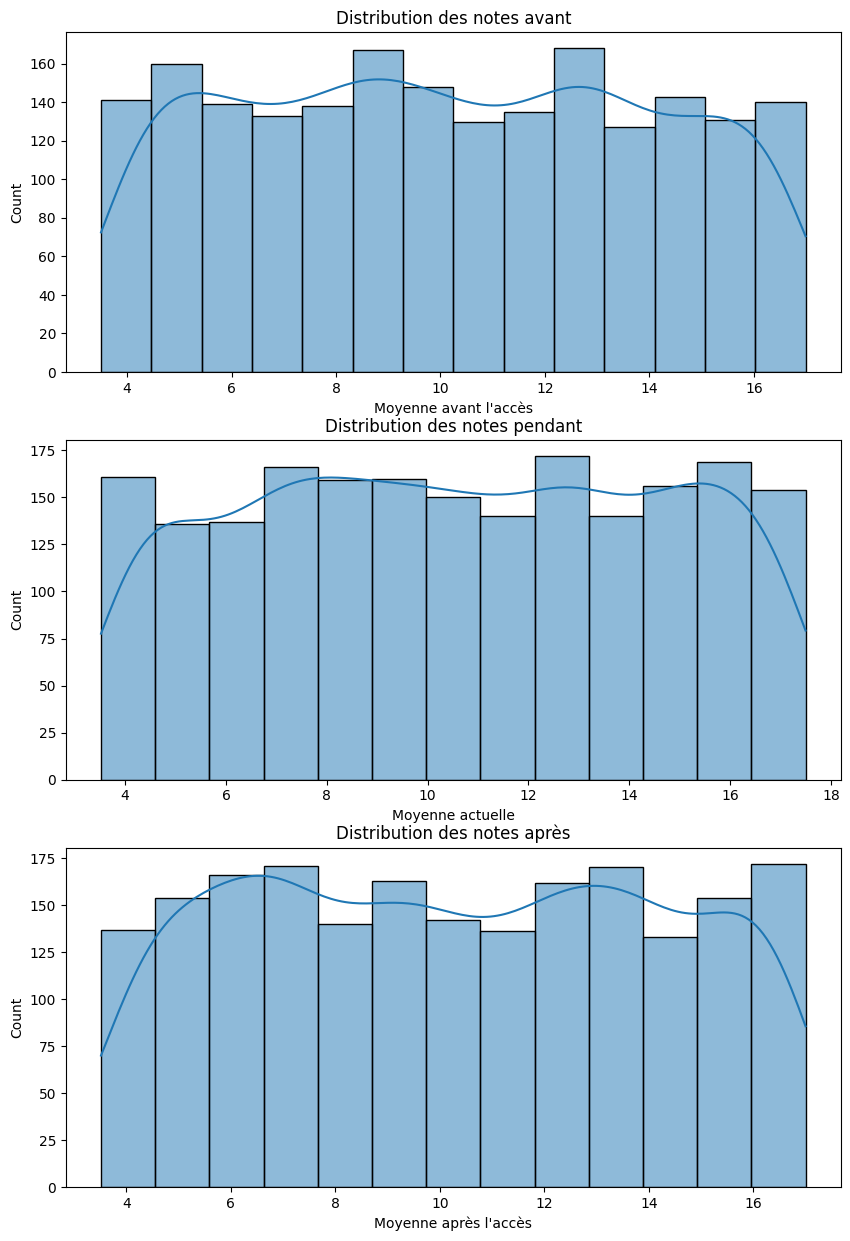

In [224]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
sns.histplot(df["Moyenne avant l'accès"], kde=True, ax=axes[0]).set_title('Distribution des notes avant')
sns.histplot(df['Moyenne actuelle'], kde=True, ax=axes[1]).set_title('Distribution des notes pendant')
sns.histplot(df["Moyenne après l'accès"], kde=True, ax=axes[2]).set_title('Distribution des notes après')

## Boxplots pour identifier les valeurs aberrantes

<Figure size 640x480 with 0 Axes>

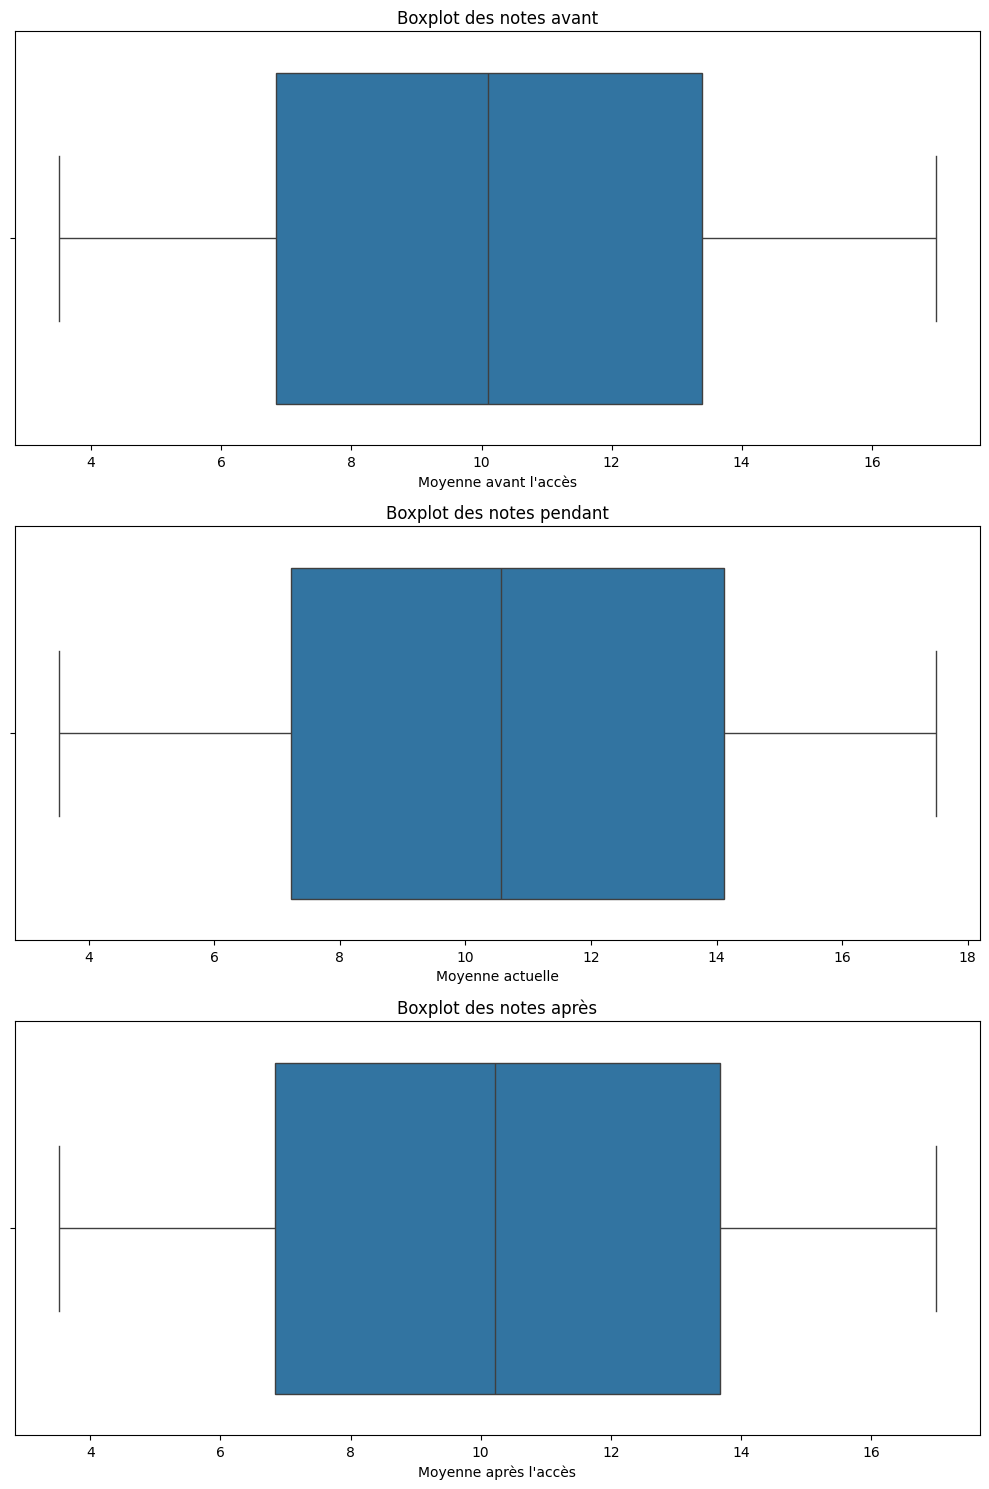

In [225]:
plt.tight_layout()
plt.show()
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
sns.boxplot(x=df["Moyenne avant l'accès"], ax=axes[0]).set_title('Boxplot des notes avant')
sns.boxplot(x=df['Moyenne actuelle'], ax=axes[1]).set_title('Boxplot des notes pendant')
sns.boxplot(x=df["Moyenne après l'accès"], ax=axes[2]).set_title('Boxplot des notes après')

plt.tight_layout()
plt.show()

## Matrice de corrélation pour comprendre les relations entre variables

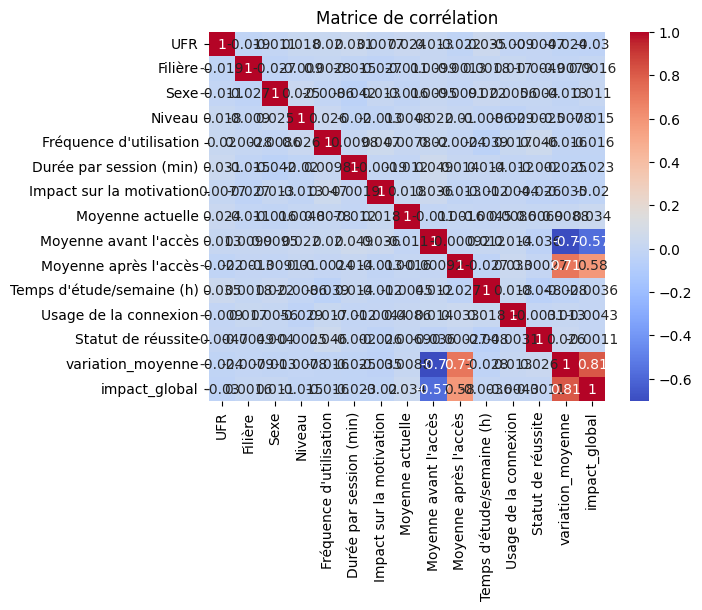

In [226]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

## Trainset

In [227]:
df.head()

,UFR,Filière,Sexe,Niveau,Fréquence d'utilisation,Durée par session (min),Impact sur la motivation,Moyenne actuelle,Moyenne avant l'accès,Moyenne après l'accès,Temps d'étude/semaine (h),Usage de la connexion,Statut de réussite,variation_moyenne,impact_global
0,1,1,0,2,1,179,0,7.131486,10.186278,16.147228,7,2,1,5.960951,1
1,2,6,0,1,2,145,1,3.547731,12.618552,16.408861,11,2,1,3.790309,1
2,0,1,1,1,2,10,0,15.392803,4.821351,12.657355,8,0,1,7.836004,1
3,1,3,1,1,1,245,0,11.010319,5.627384,7.837539,21,2,1,2.210154,1
4,1,3,1,1,1,36,0,9.919945,5.524963,4.105976,30,0,0,-1.418987,0


In [228]:
from sklearn.model_selection import train_test_split

In [229]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [230]:
trainset['impact_global'].value_counts()

impact_global
1    801
0    799
Name: count, dtype: int64

In [231]:
testset['impact_global'].value_counts()

impact_global
1    210
0    190
Name: count, dtype: int64

In [232]:
def preprocessing(df):
    
    X = df.drop('impact_global', axis=1)
    y = df['impact_global']
    
    print(y.value_counts())
    
    return X, y

In [233]:
X_train, y_train = preprocessing(trainset)

impact_global
1    801
0    799
Name: count, dtype: int64


## Modélisation

In [234]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression

from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import learning_curve


In [235]:
model_1 = RandomForestClassifier(random_state=0)
model_2 = AdaBoostClassifier(random_state=0)

## Procédure d'évalution

In [236]:
# Réorganiser les colonnes de X_test
X_test = X_test[X_train.columns]


In [237]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='Score d\'entraînement')
    plt.plot(N, val_score.mean(axis=1), label='Score de validation')
    plt.legend()
    plt.xlabel('Nombre d\'étudiants')
    plt.ylabel('Score du modèle')

[[201   0]
 [  0 199]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       201
           1       1.00      1.00      1.00       199

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[[201   0]
 [  0 199]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       201
           1       1.00      1.00      1.00       199

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R alg

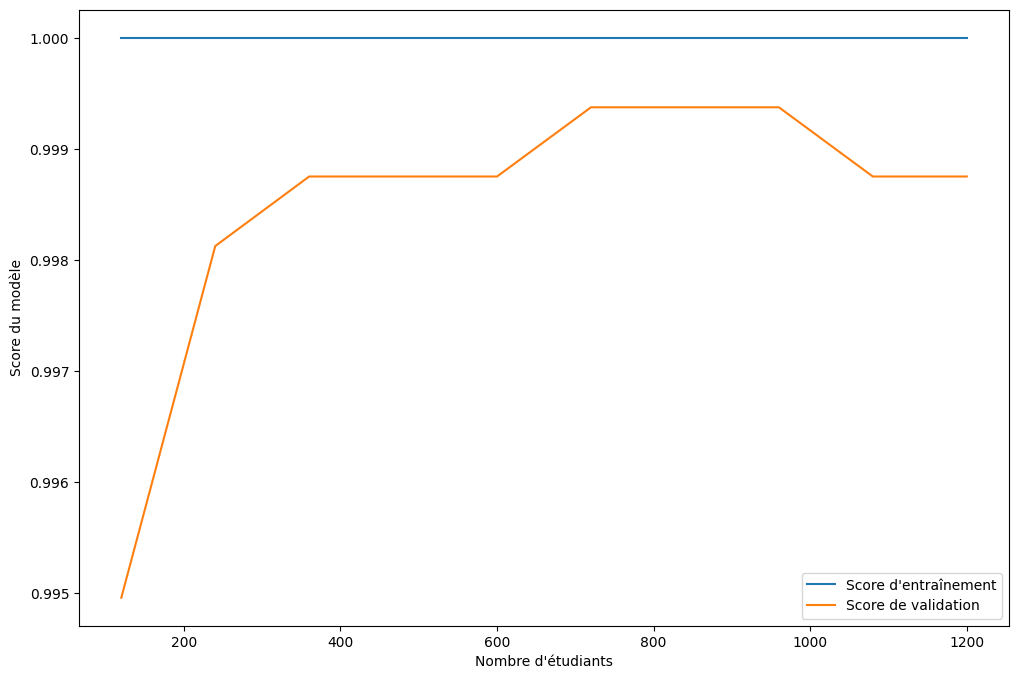

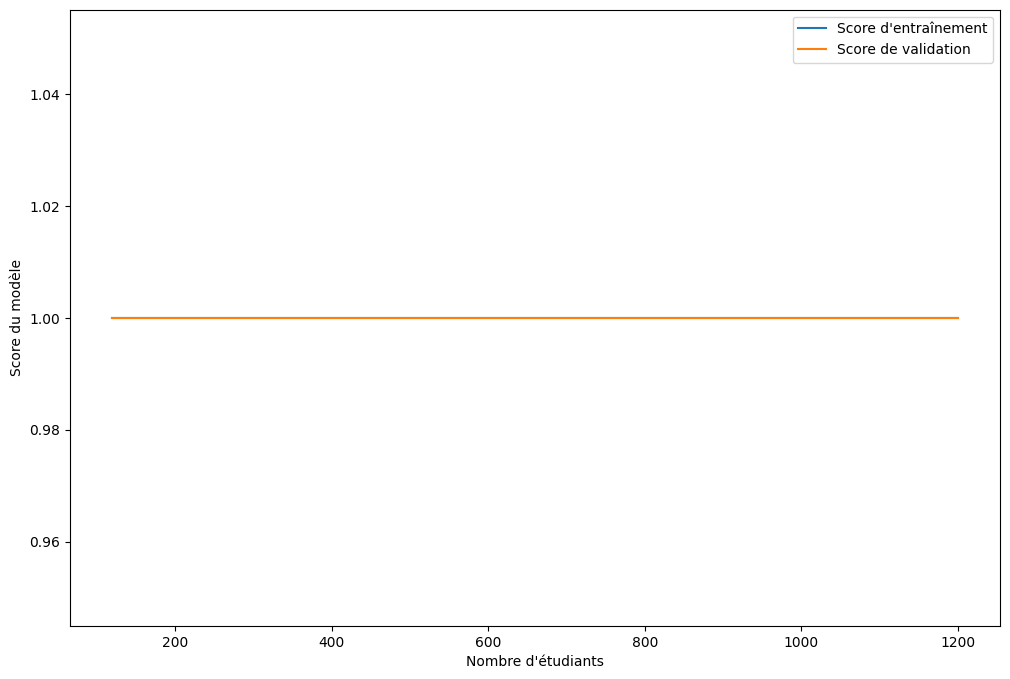

In [238]:
evaluation(model_1)
evaluation(model_2)

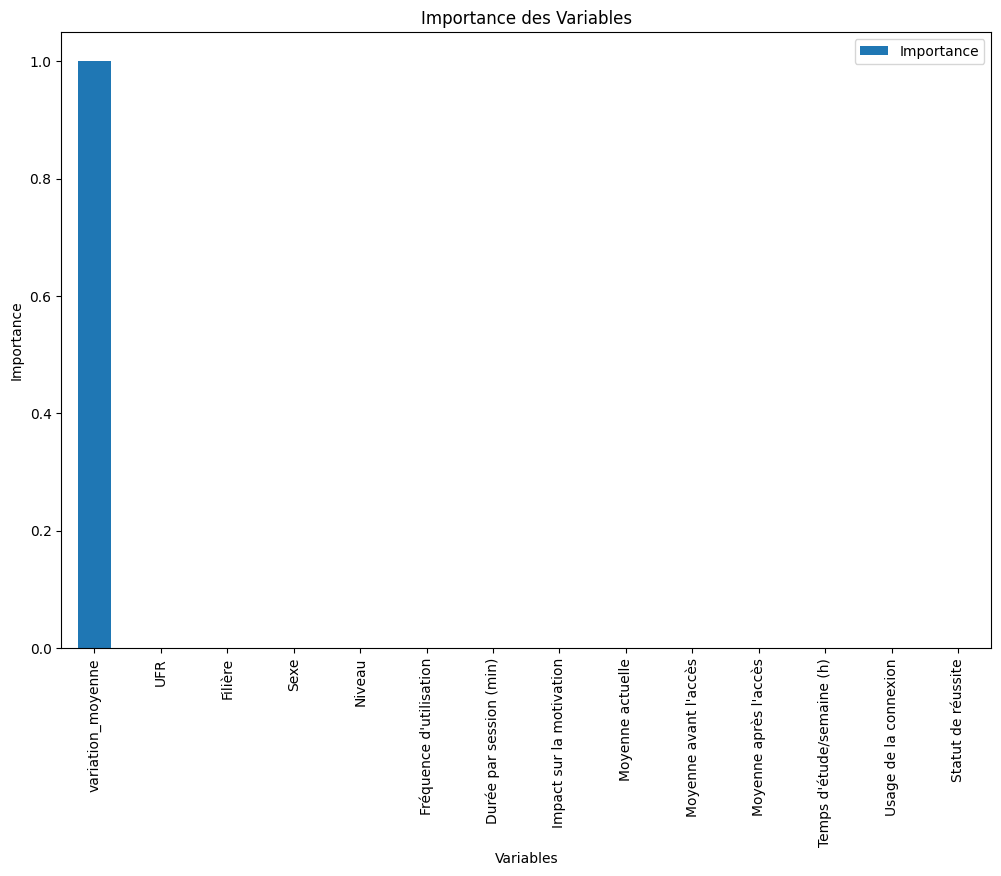

In [239]:
# Créer un DataFrame avec les importances des fonctionnalités
feature_importances_df = pd.DataFrame(model_2.feature_importances_, index=X_train.columns, columns=['Importance'])

# Trier les importances par ordre décroissant
feature_importances_df_sorted = feature_importances_df.sort_values(by='Importance', ascending=False)

# Tracer le graphique en barres
feature_importances_df_sorted.plot.bar(figsize=(12, 8))
plt.xlabel('Variables')
plt.ylabel('Importance')
plt.title('Importance des Variables')
plt.show()

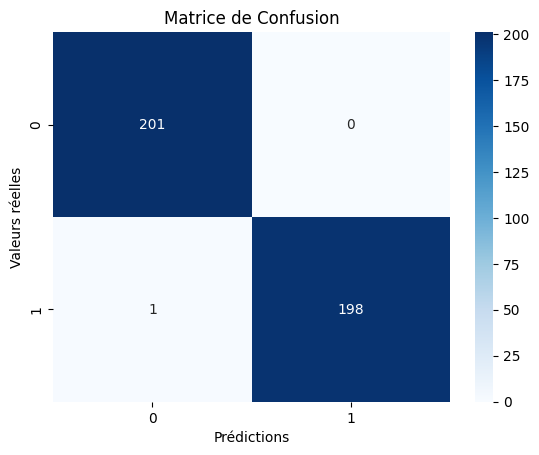

In [240]:
# Visualiser la matrice de confusion 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') 
plt.title('Matrice de Confusion') 
plt.xlabel('Prédictions') 
plt.ylabel('Valeurs réelles') 
plt.show()

Moyenne des prédictions: 0.495
Moyenne des notes avant: 10.171753298899421
Moyenne des notes pendant: 10.582647510781033
Moyenne des notes après: 10.308385188310417


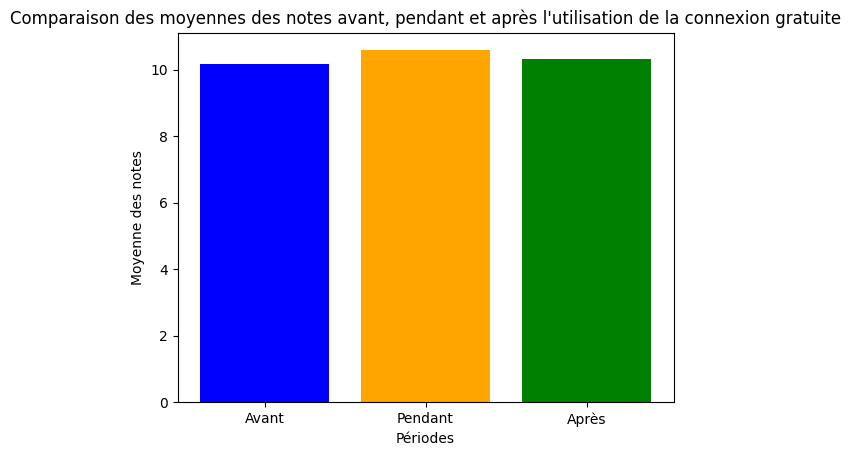

In [241]:
# Calculer la moyenne des prédictions
mean_prediction = np.mean(y_pred)
print(f"Moyenne des prédictions: {mean_prediction}")

# Comparer les moyennes des notes
mean_avant = df["Moyenne avant l'accès"].mean()
mean_test = df['Moyenne actuelle'].mean()
mean_apres = df["Moyenne après l'accès"].mean()

print(f"Moyenne des notes avant: {mean_avant}")
print(f"Moyenne des notes pendant: {mean_test}")
print(f"Moyenne des notes après: {mean_apres}")

# Visualisation des moyennes des notes
labels = ['Avant', 'Pendant', 'Après']
means = [mean_avant, mean_test, mean_apres]

plt.bar(labels, means, color=['blue', 'orange', 'green'])
plt.xlabel('Périodes')
plt.ylabel('Moyenne des notes')
plt.title('Comparaison des moyennes des notes avant, pendant et après l\'utilisation de la connexion gratuite')
plt.show()


impact_global
1    1011
0     989
Name: count, dtype: int64


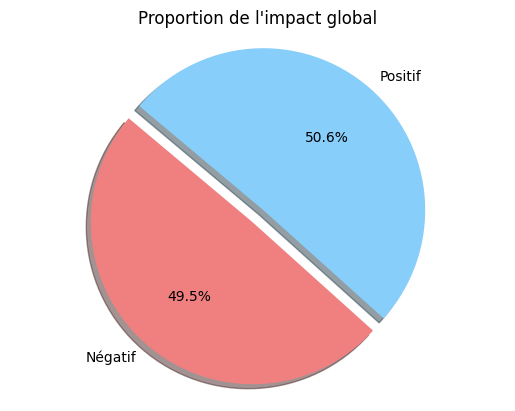

In [243]:


# Analyse de l'impact global
impact_count = df['impact_global'].value_counts()
print(impact_count)

# Visualisation de l'impact global
labels = ['Négatif', 'Positif']
sizes = [impact_count[0], impact_count[1]]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # Explosion du premier segment (Négatif)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Proportion de l\'impact global')
plt.axis('equal')  # Égalité de proportions
plt.show()
